In [9]:
import pandas as pd
import numpy as np

In [10]:
data = pd.read_csv('Dropout_Academic Success - Sheet1.csv')

In [11]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [5]:
data.shape

(4424, 37)

<AxesSubplot:>

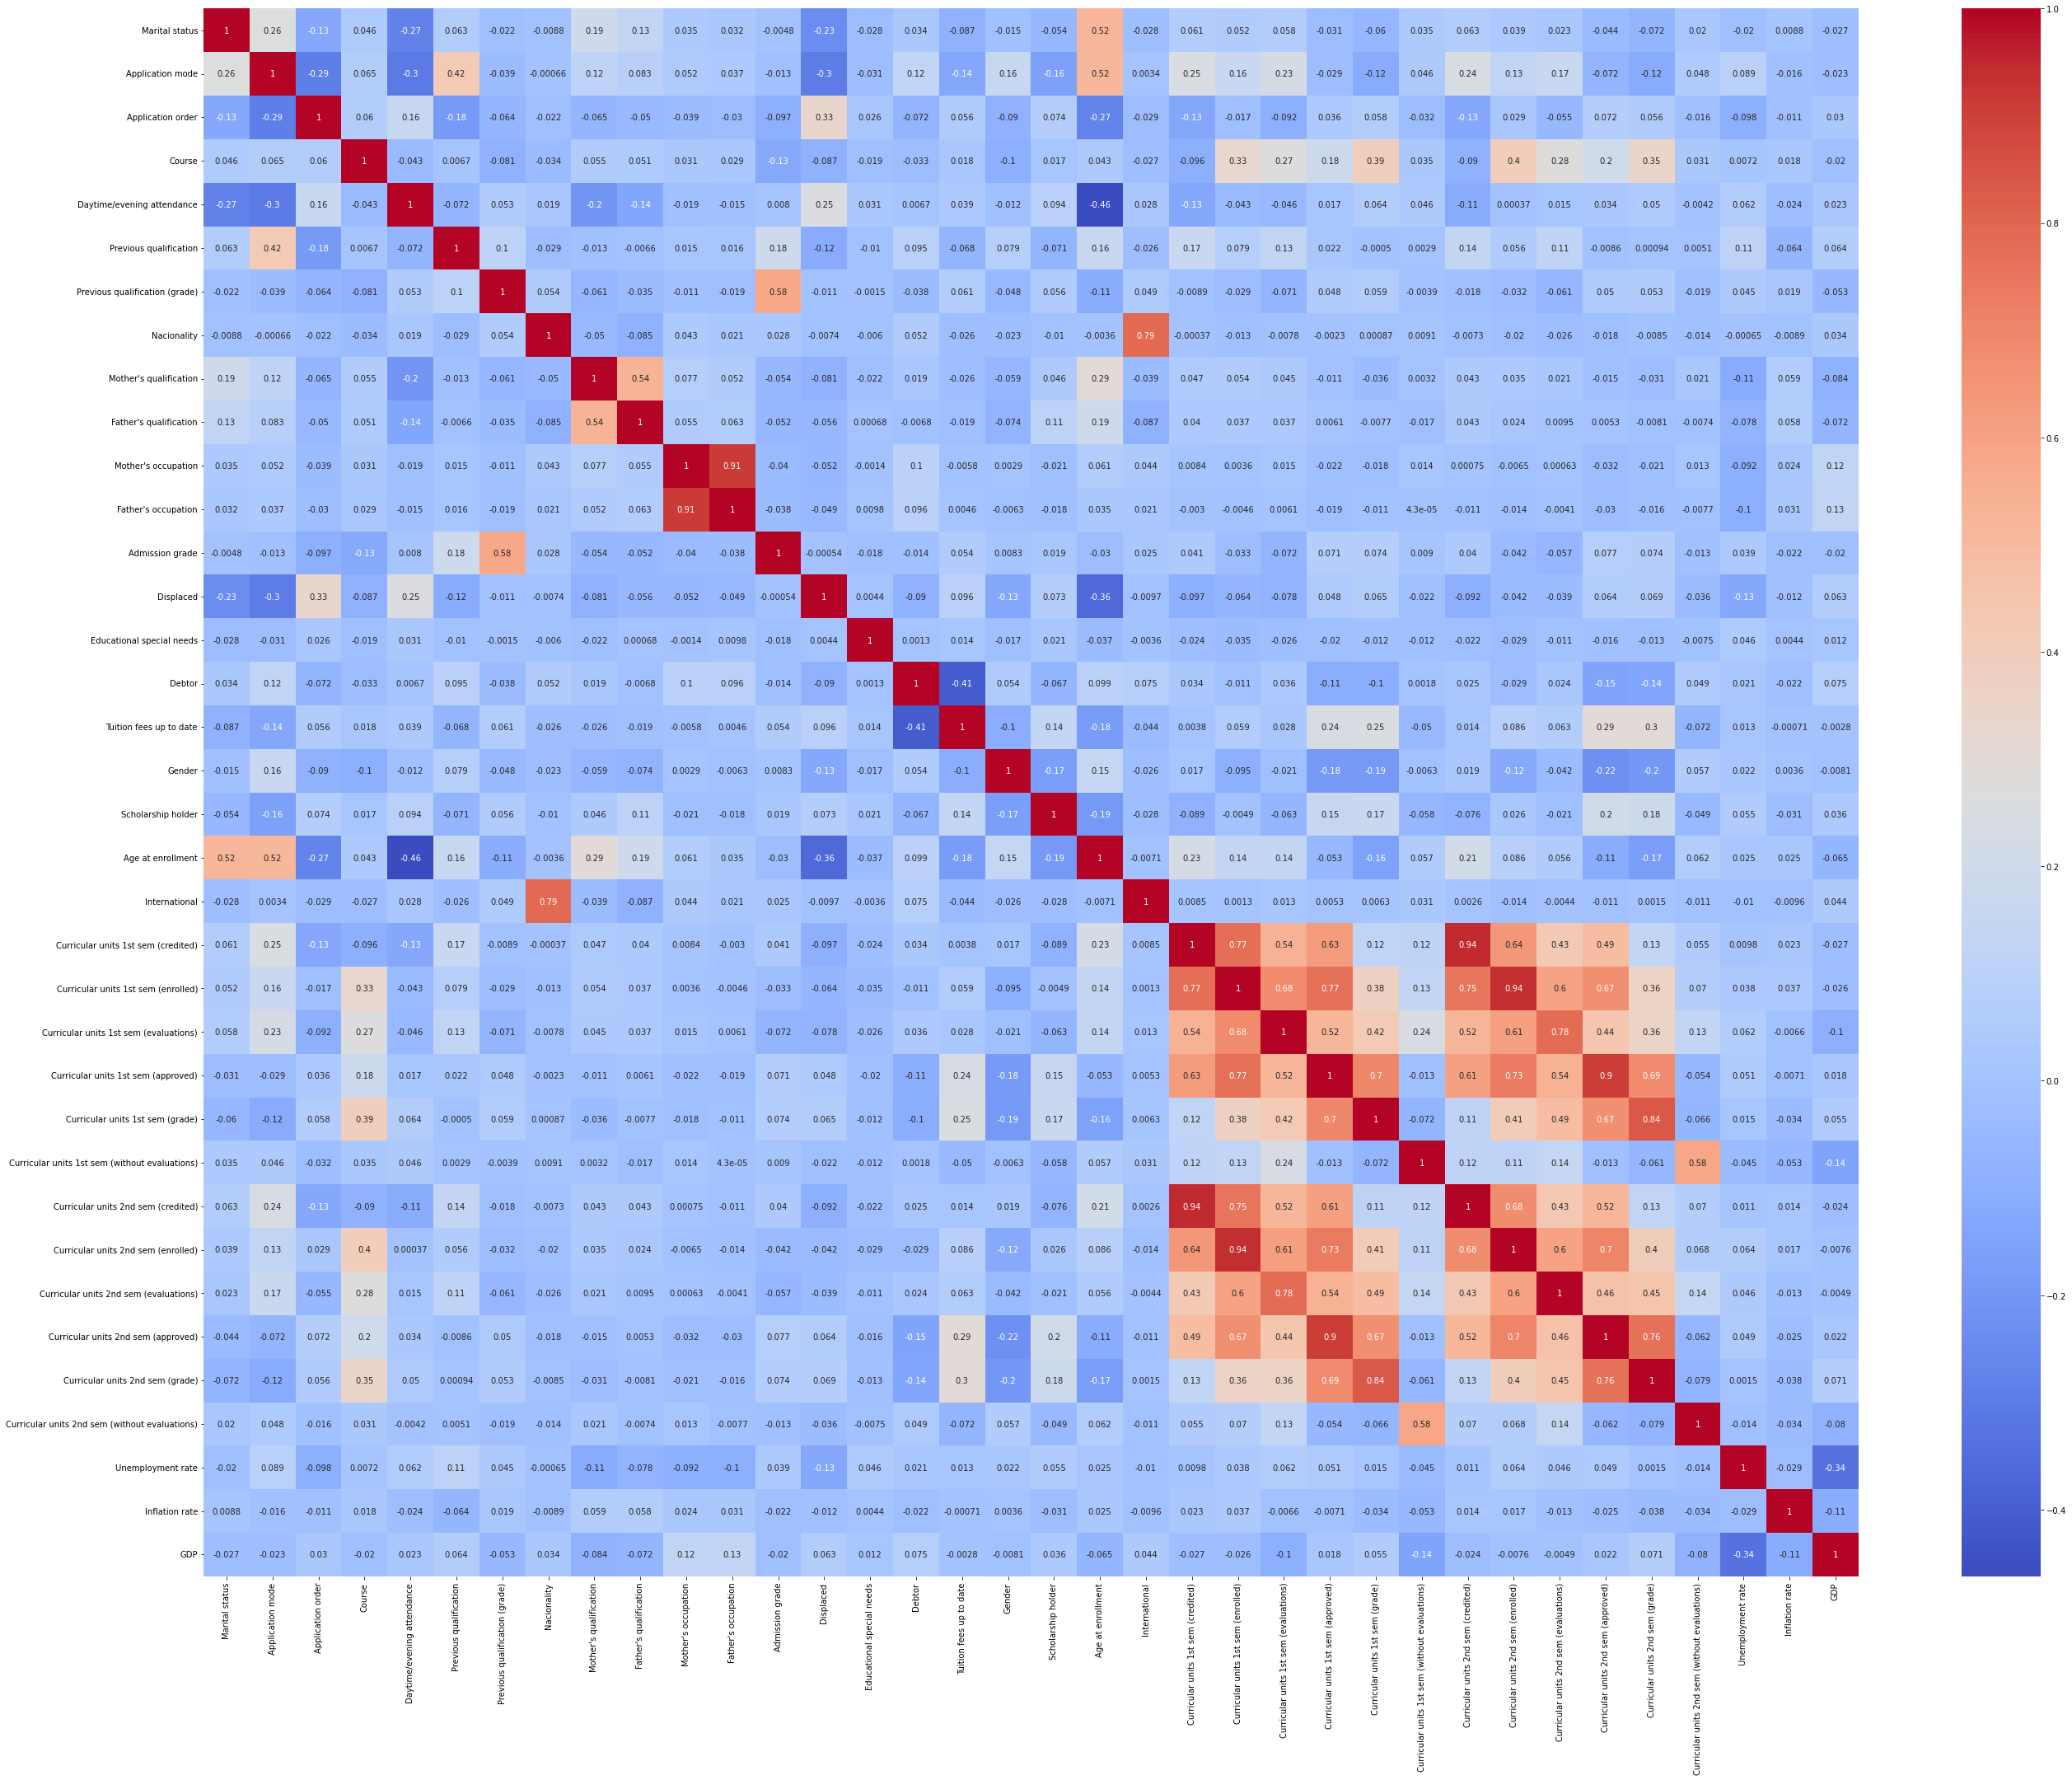

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = data.corr()
plt.figure(figsize = (45,35))
sns.heatmap(corr_matrix,cmap = 'coolwarm', annot = True)

In [6]:
cols = data.columns
cols

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

Text(0.5, 1.0, 'Co-relation between Curricular units')

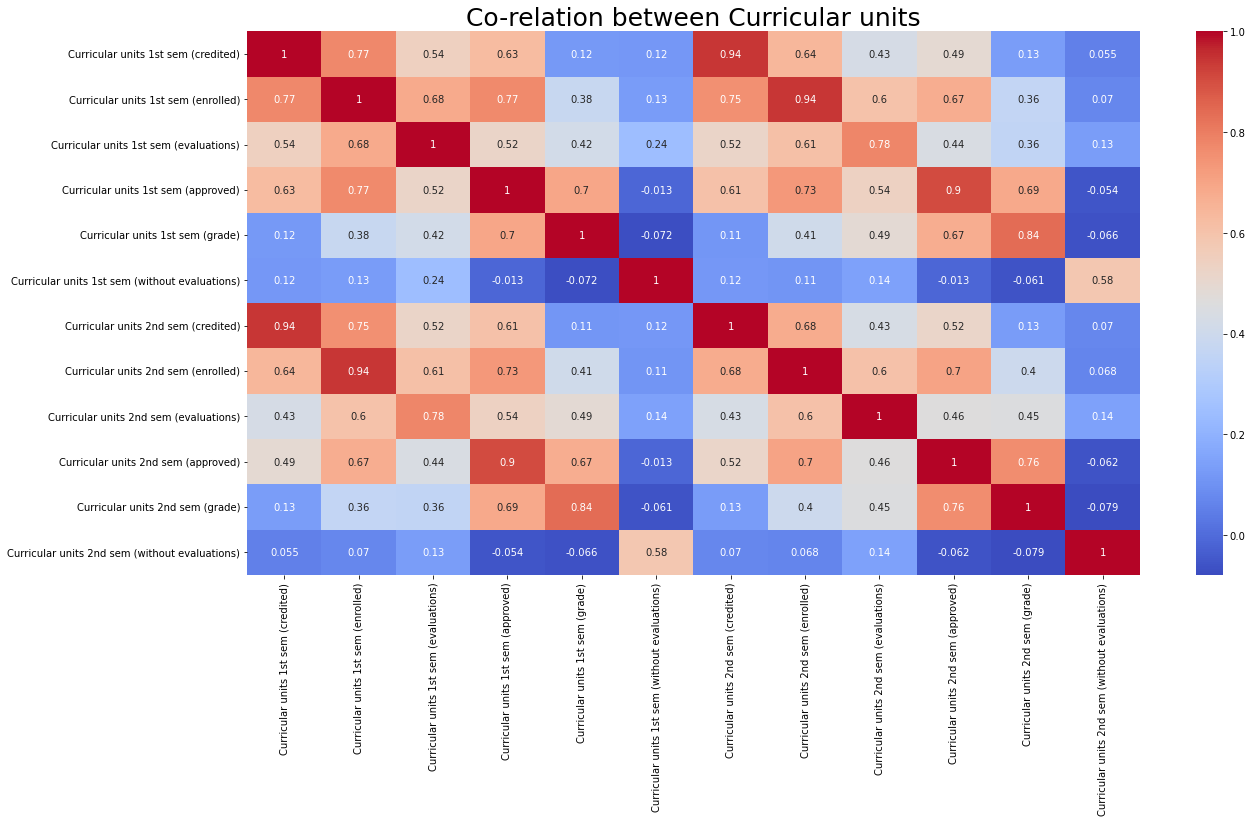

In [17]:
plt.figure(figsize = (20,10))
sns.heatmap(data[['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)']].corr(),cmap = 'coolwarm',annot = True).set_title("Co-relation between Curricular units",fontsize=25)

Text(0.5, 1.0, 'Co-relation mothers and fathers ocupation')

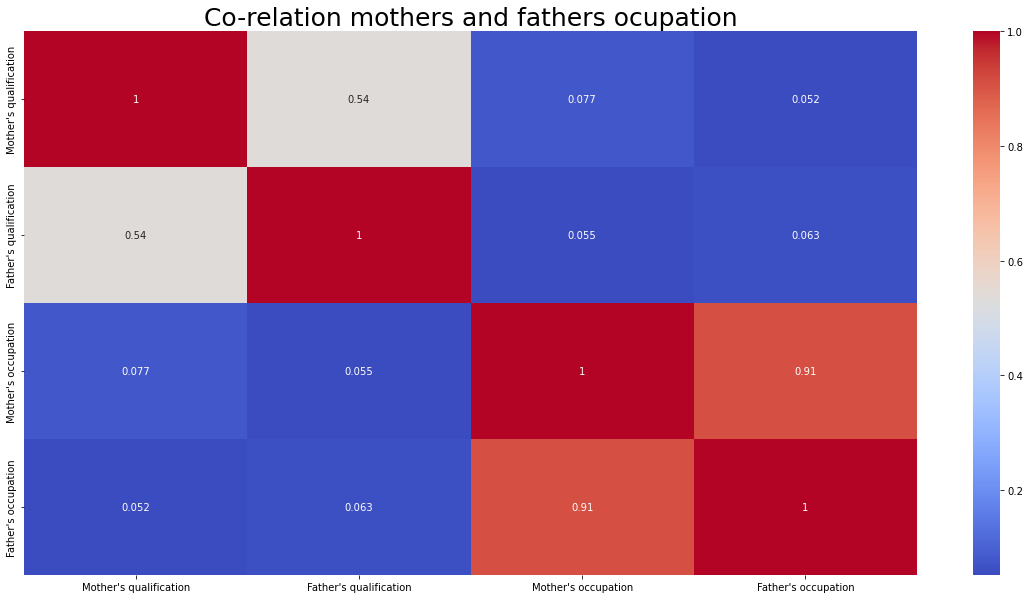

In [18]:
plt.figure(figsize = (20,10))
sns.heatmap(data[["Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation"]].corr(),cmap = 'coolwarm',annot = True).set_title("Co-relation mothers and fathers ocupation",fontsize=25)

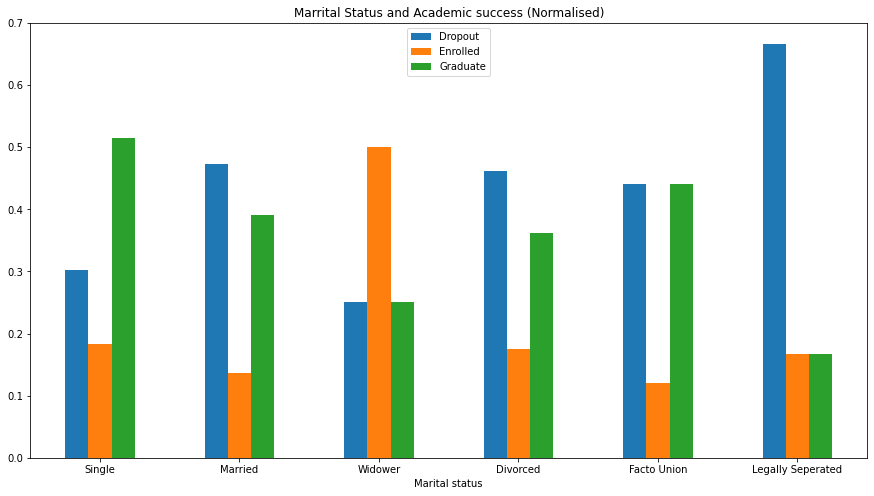

In [24]:
pd.crosstab(data["Marital status"], data["Target"], normalize='index').plot(kind="bar", figsize=(15,8), title="Marrital Status and Academic success (Normalised)" )
plt.xticks([0, 1, 2, 3, 4, 5], ['Single', 'Married', 'Widower', 'Divorced', 'Facto Union', 'Legally Seperated'], rotation=0)
plt.legend(loc=9)
plt.show()

<AxesSubplot:>

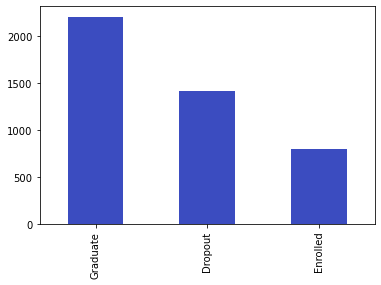

In [47]:
data['Target'].value_counts().plot(kind = 'bar',cmap = 'coolwarm')

# Dropping the rows with "Enrolled" student

In [12]:
data =data[data.Target != 'Enrolled']

 # Encoding Target columns

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(data['Target'])
label_encoder.classes_

array(['Dropout', 'Graduate'], dtype=object)

In [14]:
data.drop(columns = ['Target'],inplace=True)
data['Target'] = target_encoded

In [25]:
data['Target'].value_counts()


1    2209
0    1421
Name: Target, dtype: int64

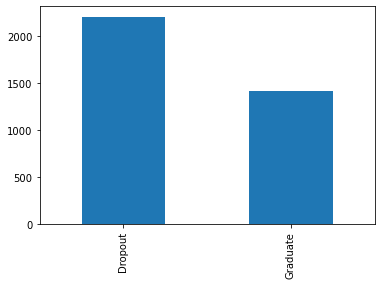

In [23]:
data['Target'].value_counts().plot(kind ='bar')
plt.xticks([0,1],['Dropout','Graduate']);

## Data split in train and test set

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x = data.drop(columns = ['Target'], axis = 1)
y = data['Target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=22)

In [17]:
x_train.shape,x_test.shape,y_train.shape,x_test.shape

((2904, 36), (726, 36), (2904,), (726, 36))

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from sklearn.model_selection import cross_val_score
import warnings

In [19]:
def model_tester(model_dict, X, y, cv=5):
    """
    Cross Validation for Models in Model Dict...
    Providing Mean value of cross validation for each Parameter
    
    Parameter Includes : accuracy, precision, recall
    """
    
    warnings.filterwarnings("ignore")
    
    scoring_param = ["accuracy", "precision", "recall"]
    
    cv_score = {} # Creating dict with the model name and the scores
    
    np.random.seed(42)
    for name, model in model_dict.items():
        # enumerating through models we wants to build
        cv_score[name] = {}
        for param in scoring_param:
            score = np.mean(cross_val_score(model, X, y, scoring=param, cv=cv))
            cv_score[name][param] = score 
    cv = pd.DataFrame(data=cv_score)
    return cv

In [20]:
model_dict = {"DT" : DecisionTreeClassifier(),
              "KNN - Classifier" : KNeighborsClassifier(),
              "Random Forest Classifier" : RandomForestClassifier(),
              "extraTree":ExtraTreesClassifier(),
             "AdaBoost":AdaBoostClassifier()}

model_tester(model_dict, x, y, cv=10)

,DT,KNN - Classifier,Random Forest Classifier,extraTree,AdaBoost
accuracy,0.849587,0.762810,0.906612,0.909917,0.903857
precision,0.877068,0.766347,0.894277,0.894816,0.898326
recall,0.870090,0.879585,0.958805,0.966051,0.949755


In [26]:
dt = DecisionTreeClassifier()

In [28]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
pred = dt.predict(x_test)

In [30]:
accuracy_score(pred,y_test)

0.8443526170798898

In [31]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
accuracy_score(pred,y_test)

0.9118457300275482